## Practical Work 3

For this practical work, the trainees will have to develop a Python program that is able to implement the accelerated gradient descent methods <b>(Momentum and NAG)</b> in order to achieve the linear regression of a set of datapoints.

##### Please notice that we will apply these algorithm to single variable LR.
##### Only batch variant is required.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import math
from scipy.linalg import norm
from sklearn.metrics import r2_score
%matplotlib inline

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [2]:
X = np.linspace(0,20)
X

array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
        2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
        4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
        6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
        8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
       10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
       12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
       14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
       16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
       18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ])

In [3]:
a=-1
b=2
y=a*X+b
y

array([  2.        ,   1.59183673,   1.18367347,   0.7755102 ,
         0.36734694,  -0.04081633,  -0.44897959,  -0.85714286,
        -1.26530612,  -1.67346939,  -2.08163265,  -2.48979592,
        -2.89795918,  -3.30612245,  -3.71428571,  -4.12244898,
        -4.53061224,  -4.93877551,  -5.34693878,  -5.75510204,
        -6.16326531,  -6.57142857,  -6.97959184,  -7.3877551 ,
        -7.79591837,  -8.20408163,  -8.6122449 ,  -9.02040816,
        -9.42857143,  -9.83673469, -10.24489796, -10.65306122,
       -11.06122449, -11.46938776, -11.87755102, -12.28571429,
       -12.69387755, -13.10204082, -13.51020408, -13.91836735,
       -14.32653061, -14.73469388, -15.14285714, -15.55102041,
       -15.95918367, -16.36734694, -16.7755102 , -17.18367347,
       -17.59183673, -18.        ])

### Plot X vs. y

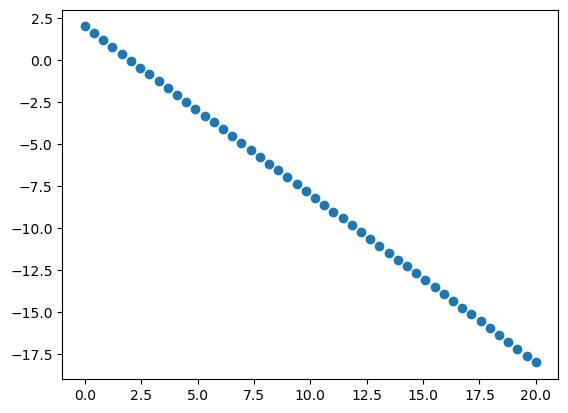

In [4]:
plt.scatter(X,y)

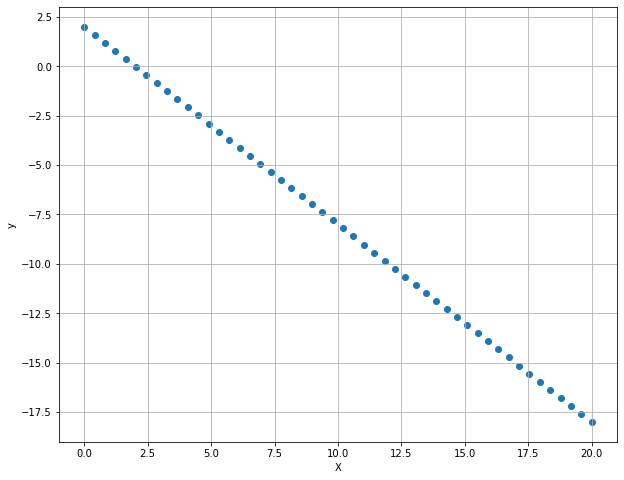

In [4]:
#model answer

#### Use your final version of the implemented Batch GD algorithm for single variable to find the best line filt of the given data.
#### Choose the suitable number of iterations, learning rate, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph), best fit line)

In [5]:
def GD(X,y,alpha=0.001,max_iter=1000,stop_criteria=0.001,convergence_check=0.001):
    '''
    Implementation of the one variable gradient descent.
    
    Inputs:
    -------
    X: input feature for one variable linear regression (array)
    y: target (array)
    alpha: hyperparameter for updating the thetas using the gradient (double)
    stop_criteria: stop if the gradient norm is less than this threshold (double)
    convergence_check: stop if the absolute of difference in loss between any 2 iterations is less than this threshold (double)
    
    Outputs:
    --------
    thetas_0: list with all thetas_0 from the initialization till the convergence (without including the last one) (list)
    thetas_1: list with all thetas_1 from the initialization till the convergence (without including the last one) (list)
    loss: list with the amount of loss corresponding to each theta 0 and theta 1
    theta_0: final theta_0 (optimal) (double)
    theta1: final theta_1 (optimal) (double)
    
    '''
    theta_0 = 0
    theta_1 = 0
    m = len(y)
    loss = [] #the list where we save the loss after each iteration
    thetas_0 = [] #each theta0 associated with coressponding loss
    thetas_1 = [] #each theta1 associated with coressponding loss
    h_xs = [] #has the outputs for each corresponding couple of theta
    
    for i in range(max_iter):
        thetas_0.append(theta_0)
        thetas_1.append(theta_1)
        print(f"******************** Iteration {i} **********************")
        print("\n")

        h_x = theta_0 + theta_1*X
        h_xs.append(h_x)
        print("h(x): ", h_x)
        print("\n")

        error = h_x - y
        print("Error Vector:\n", error)
        print("\n")

        J_theta = (1/(2*m))*(error @ error)
        loss.append(J_theta)
        print("j = ", J_theta)
        print("\n")
        if (i>0):
            if (np.abs((loss[i-1]-loss[i])) < convergence_check):
                break

        d_theta_0 = (1/m)*error.sum()
        d_theta_1 = (1/m)* (error @ X)

        gv = np.array([[d_theta_0],[d_theta_1]])
        gv_norm = norm(gv)
        print("Gradient Vector:\n ", gv)
        print("\n")
        print("gradient Vector Norm:\n", gv_norm)
        print("\n")
        if gv_norm < stop_criteria:
            break

        theta_0 = theta_0 - (alpha*d_theta_0)
        theta_1 = theta_1 - (alpha*d_theta_1)
        print("theta_0_new: ", theta_0)
        print("theta_1_new: ", theta_1)
        print("\n")
        # the last update of theta is not in the list containing the thetas but is in the variables theta_0 and theta_1.
        
    return thetas_0, thetas_1, loss, h_xs, theta_0, theta_1

#### Try your function with any input parameterss of your choice.
##### The following results uses alpha = 0.0005 and max. iterations = 300.

In [7]:
thetas_0, thetas_1, loss, h_xs, theta_0, theta_1 = GD(X,y,0.0005,300)

******************** Iteration 0 **********************


h(x):  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


Error Vector:
 [-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]


j =  49.34693877551021


Gradient Vector:
  [[  8.        ]
 [114.69387755]]


gradient Vector Norm:
 114.97254258164628


theta_0_new:  -0.004
theta_1_n

In [6]:
#model answer

****************** Iteration 0 ********************

h(x):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j = 49.34693877551021

Gradient Vector:
[[  8.        ]
 [114.69387755]]

Gradient Vector Norm:
114.97254258164628

theta_0_new : -0.004
theta_1_new : -0.05734693

In [8]:
h_x_p = theta_0 + theta_1 * X
r2_score(y,h_x_p)

0.9686158031920962

In [9]:
#model answer

r2_score: 0.9686158031920962


##### It is recommended to define a function for each plot. This will help you to easly plot the learning curves when you use different values of hyperparameters.

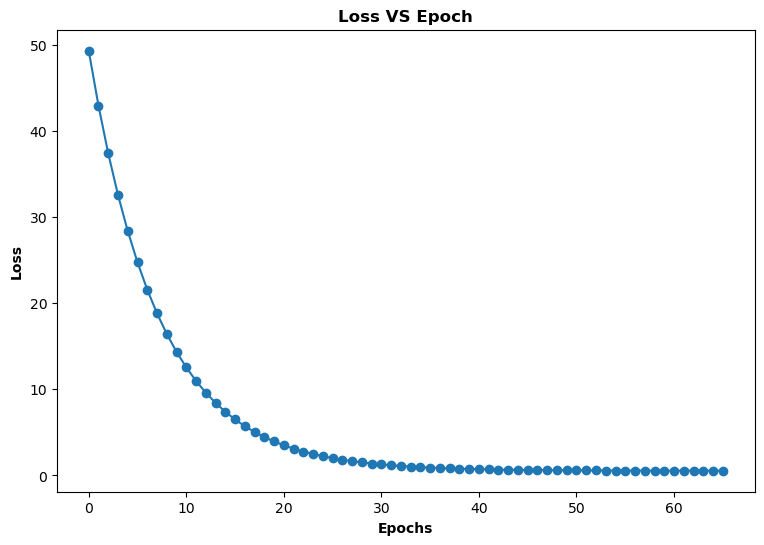

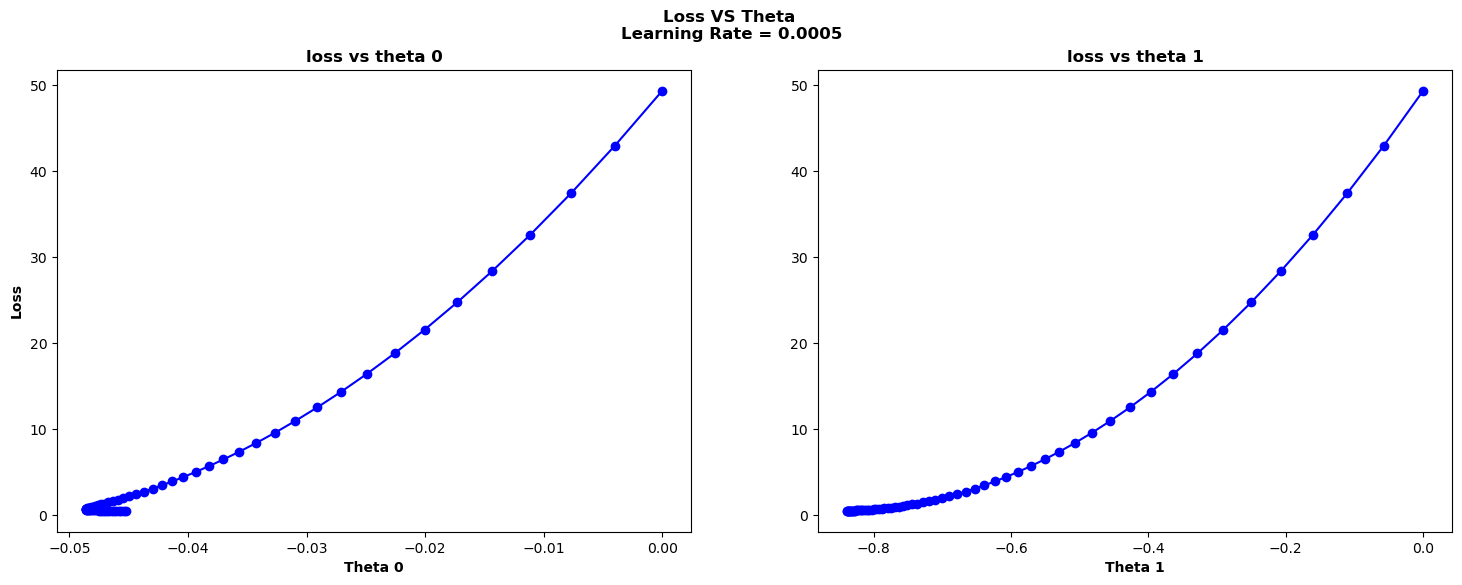

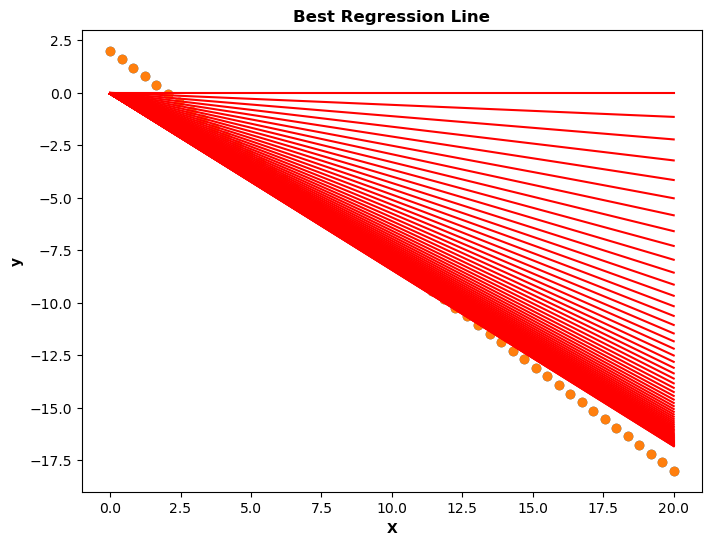

In [9]:
#note that we are using here the batch GD so the x axis is actually the no. of iterations over the whole data (epochs).
#as in the GD function we save the loss after every epoch (whole data is used in evey iteration to update the thetas).
def lossVsepochs(loss):
    plt.figure(figsize=(9,6))
    plt.plot(loss,'-o')
    plt.xlabel('Epochs',fontweight='bold')
    plt.ylabel('Loss',fontweight='bold')
    plt.title('Loss VS Epoch',fontweight='bold')
    
def lossVstheta(thetas_0, thetas_1, loss, alpha=0.001):
    figure, axis = plt.subplots(1, 2, figsize=(18,6))
    plt.suptitle(f'Loss VS Theta \nLearning Rate = {alpha}',fontweight='bold')
    
    #loss vs theta_0
    axis[0].plot(thetas_0, loss,'-bo')
    axis[0].set_title('loss vs theta 0',fontweight='bold')
    axis[0].set_xlabel('Theta 0',fontweight='bold')
    axis[0].set_ylabel('Loss',fontweight='bold')
    
    #loss vs theta_1 
    axis[1].plot(thetas_1, loss,'-bo')
    axis[1].set_title('loss vs theta 1',fontweight='bold')
    axis[1].set_xlabel('Theta 1',fontweight='bold')
    
def reglines(h_xs, X, y): #h_xs is list of arrays
    plt.figure(figsize=(8,6))
    for i in range(len(h_xs)):
        plt.plot(X,h_xs[i],'r')
    plt.scatter(X,y)
    plt.xlabel('X',fontweight='bold')
    plt.ylabel('y',fontweight='bold')
    plt.title('Regression lines till convergence',fontweight='bold')
    
def best_reg(h_x_p, X, y):
    plt.scatter(X,y)
    plt.plot(X,h_x_p, 'r')
    plt.title('Best Regression Line',fontweight='bold')
    plt.xlabel('X',fontweight='bold')
    plt.ylabel('y',fontweight='bold')

lossVsepochs(loss)
lossVstheta(thetas_0, thetas_1, loss,  0.0005)
reglines(h_xs, X, y)
best_reg(h_x_p, X, y)

In [ ]:
best_reg(h_x_p, X, y)

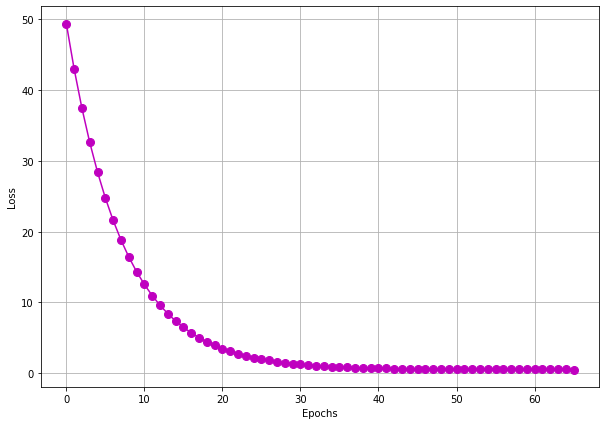

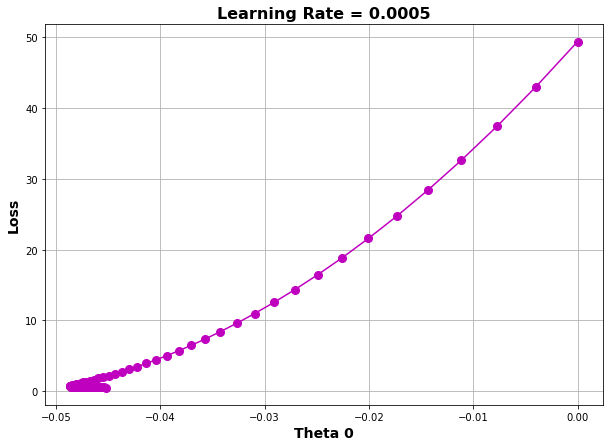

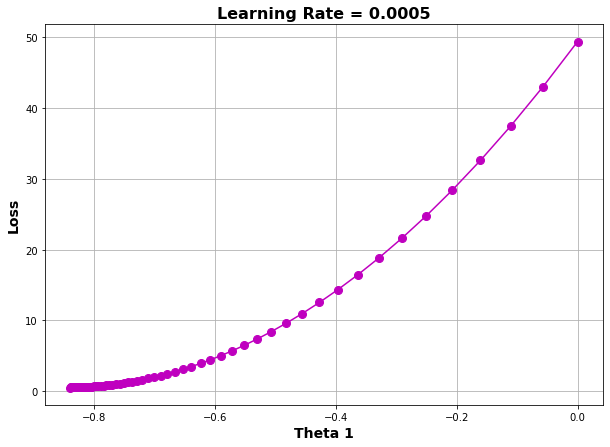

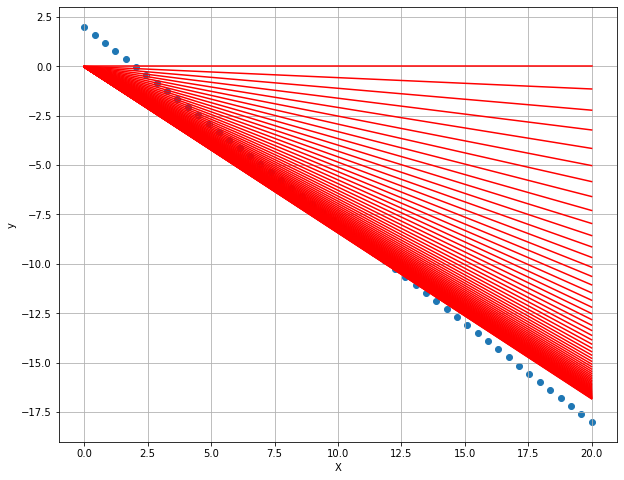

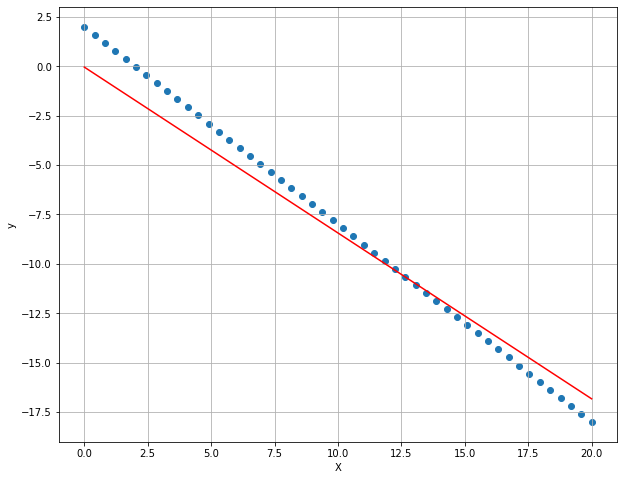

In [11]:
#model answer

### Update your Batch GD for single variable  implementation (Batch variant) to be Momentum-Based GD and check your results

#### γ takes values between 0 and 1.

In [10]:
# to solve the problem of vanishing gradient we use the momentum based  gradient descent.
def GD_momentum(X,y,alpha=0.001,gamma=0.9,max_iter=1000,stop_criteria=0.001,convergence_check=0.001):
    '''
    Implementation of the one variable gradient descent with momentum.
    
    Inputs:
    -------
    X: input feature for one variable linear regression (array)
    y: target (array)
    alpha: hyperparameter for updating the thetas using the gradient (double)
    gamma: hyperparameter to estimate the amount taken into momentum from the history (double) (from 0 to 1)
    stop_criteria: stop if the gradient norm is less than this threshold (double)
    convergence_check: stop if the absolute of difference in loss between any 2 iterations is less than this threshold (double)
    
    Outputs:
    --------
    thetas_0: list with all thetas_0 from the initialization till the convergence (without including the last one) (list)
    thetas_1: list with all thetas_1 from the initialization till the convergence (without including the last one) (list)
    loss: list with the amount of loss corresponding to each theta 0 and theta 1
    theta_0: final theta_0 (optimal) (double)
    theta1: final theta_1 (optimal) (double)
    
    '''
    theta_0 = 0
    theta_1 = 0
    m = len(y)
    v_0 = 0
    v_1 = 0
    loss = [] #the list where we save the loss after each iteration
    thetas_0 = [] #each theta0 associated with coressponding loss
    thetas_1 = [] #each theta1 associated with coressponding loss
    h_xs = [] #has the outputs for each corresponding couple of theta
    
    for i in range(max_iter):
        thetas_0.append(theta_0)
        thetas_1.append(theta_1)
        print(f"******************** Iteration {i} **********************")
        print("\n")

        h_x = theta_0 + theta_1*X
        h_xs.append(h_x)
        print("h(x): ", h_x)
        print("\n")

        error = h_x - y
        print("Error Vector:\n", error)
        print("\n")

        J_theta = (1/(2*m))*(error @ error)
        loss.append(J_theta)
        print("j = ", J_theta)
        print("\n")
        if (i>0):
            if (np.abs((loss[i-1]-loss[i])) < convergence_check):
                break

        d_theta_0 = (1/m)*error.sum()
        d_theta_1 = (1/m)* (error @ X)

        gv = np.array([[d_theta_0],[d_theta_1]])
        gv_norm = norm(gv)
        print("Gradient Vector:\n ", gv)
        print("\n")
        print("gradient Vector Norm:\n", gv_norm)
        print("\n")
        if gv_norm < stop_criteria:
            break
        
        v_0 = (gamma*v_0) + (alpha*d_theta_0)
        v_1 = (gamma*v_1) + (alpha*d_theta_1)
        theta_0 = theta_0 - v_0
        theta_1 = theta_1 - v_1
        print("theta_0_new: ", theta_0)
        print("theta_1_new: ", theta_1)
        print("\n")
        # the last update of theta is not in the list containing the thetas but is in the variables theta_0 and theta_1.
        
    return thetas_0, thetas_1, loss, h_xs, theta_0, theta_1

#### Try your function with any input parameterss of your choice.
##### The following results uses alpha = 0.0005, gamma=0.5 and max. iterations = 300.

In [11]:
thetas_0, thetas_1, loss, h_xs, theta_0, theta_1 = GD_momentum(X,y,0.0005,0.5,300)

******************** Iteration 0 **********************


h(x):  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


Error Vector:
 [-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]


j =  49.34693877551021


Gradient Vector:
  [[  8.        ]
 [114.69387755]]


gradient Vector Norm:
 114.97254258164628


theta_0_new:  -0.004
theta_1_n

In [13]:
#model answer

****************** Iteration 0 ********************

h(x):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j = 49.34693877551021

Gradient Vector:
[[  8.        ]
 [114.69387755]]

Gradient Vector Norm:
114.97254258164628

v_0 : 0.004
v_1 : 0.05734693877551021

theta_0

In [12]:
h_x_p = theta_0 + theta_1 * X
r2_score(y,h_x_p)

0.9687892837396442

In [14]:
#model answer

r2_score: 0.9687892837396442


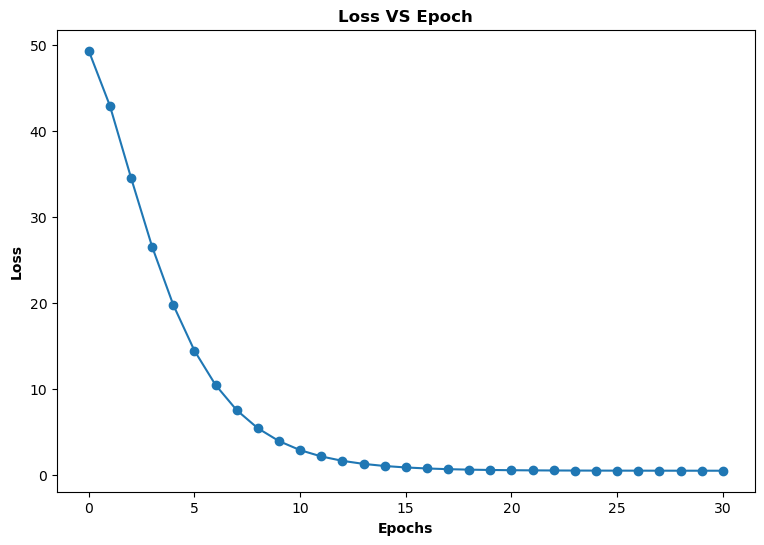

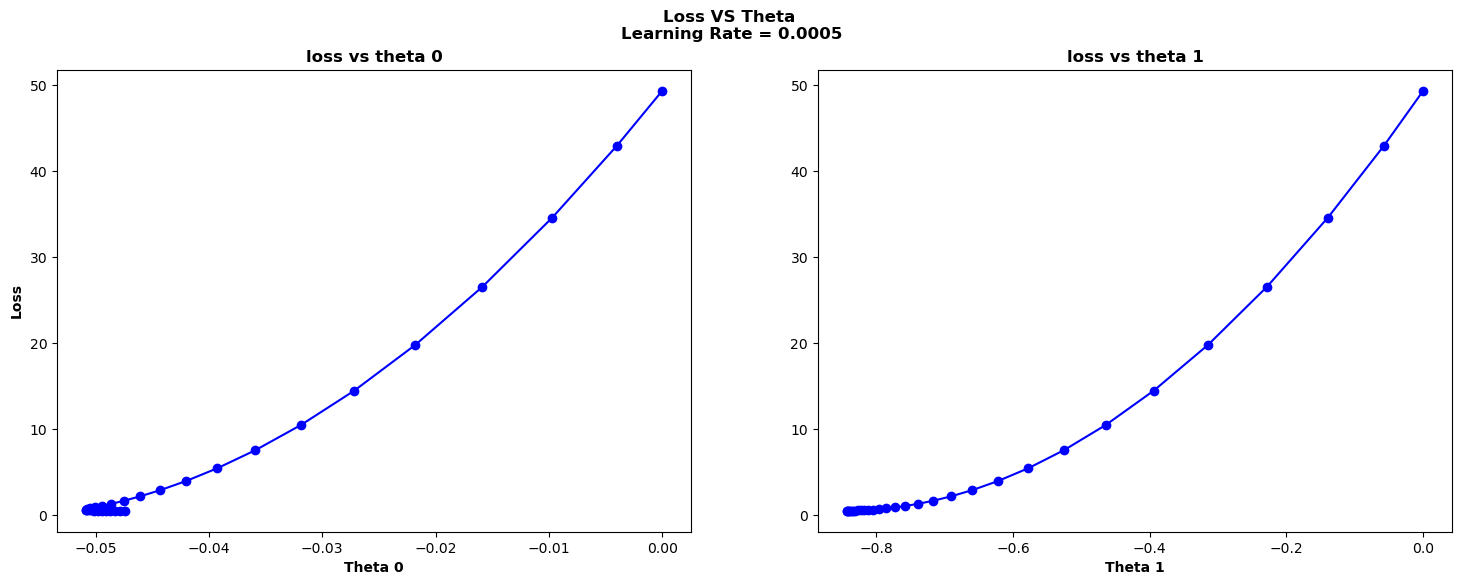

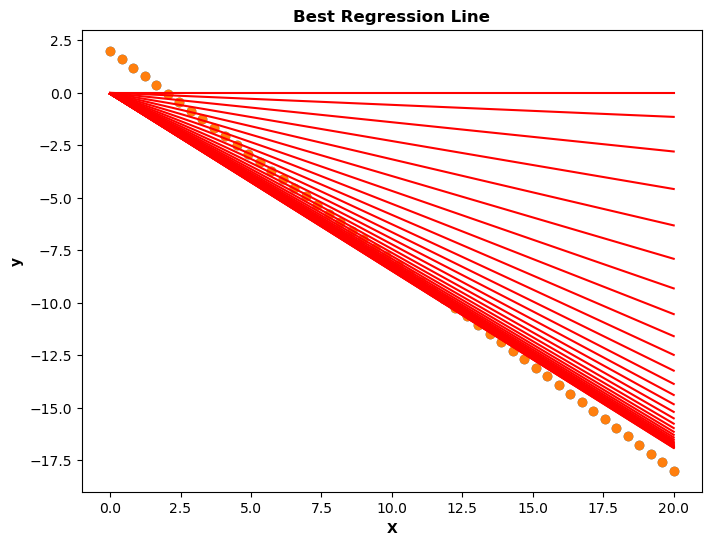

In [13]:
lossVsepochs(loss)
lossVstheta(thetas_0, thetas_1, loss,  0.0005)
reglines(h_xs, X, y)

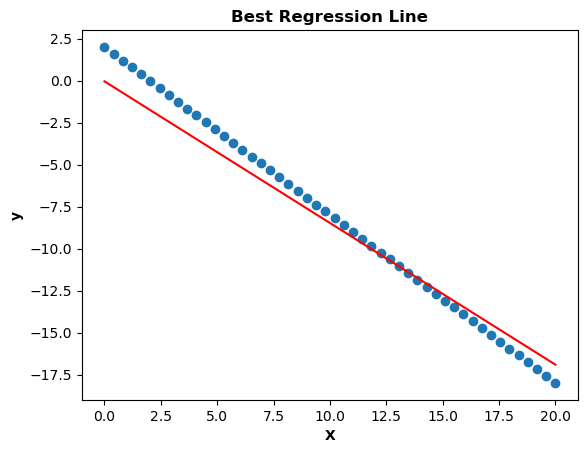

In [14]:
best_reg(h_x_p, X, y)

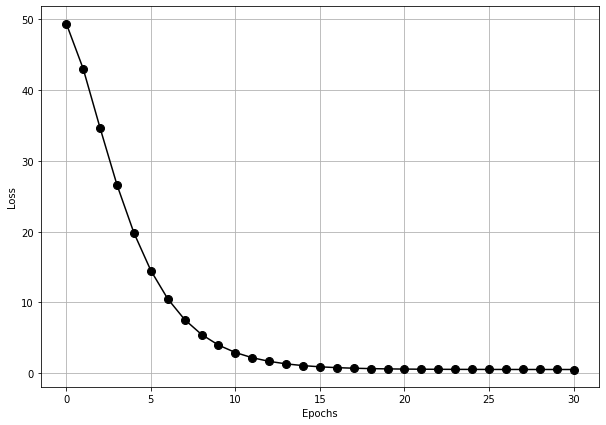

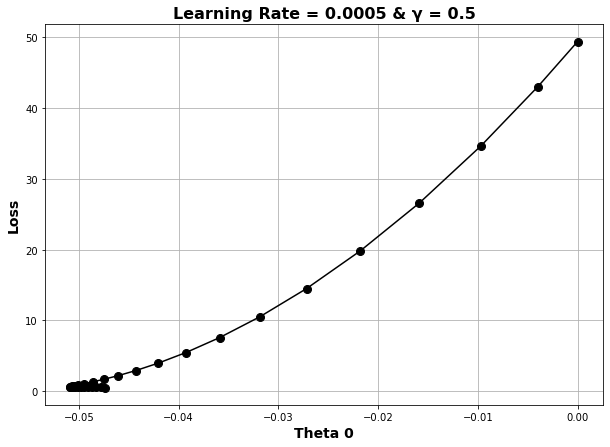

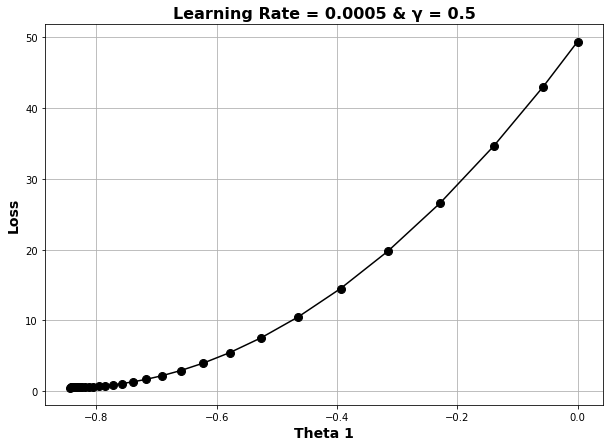

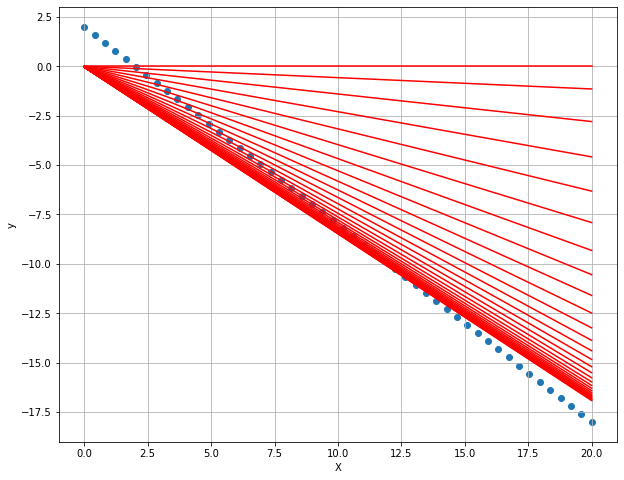

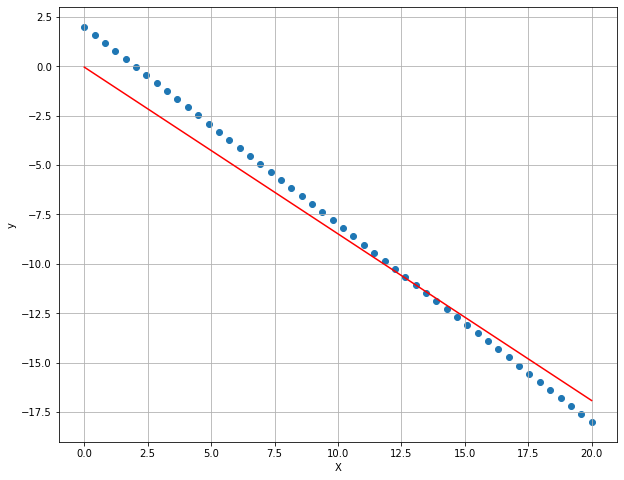

In [15]:
#model answer

#### Try another values of momentum term and check your reults.
#### Try very large values close to one and very small values close to zero. 
#### Try momentum = 0

##### The following results uses alpha = 0.0005, gamma=0.9 and max. iterations = 300.

In [15]:
thetas_0, thetas_1, loss, h_xs, theta_0, theta_1 = GD_momentum(X,y,0.0005,0.9,300)

******************** Iteration 0 **********************


h(x):  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


Error Vector:
 [-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]


j =  49.34693877551021


Gradient Vector:
  [[  8.        ]
 [114.69387755]]


gradient Vector Norm:
 114.97254258164628


theta_0_new:  -0.004
theta_1_n

In [16]:
#model answer

****************** Iteration 0 ********************

h(x):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j = 49.34693877551021

Gradient Vector:
[[  8.        ]
 [114.69387755]]

Gradient Vector Norm:
114.97254258164628

v_0 : 0.004
v_1 : 0.05734693877551021

theta_0

In [16]:
h_x_p = theta_0 + theta_1 * X
r2_score(y,h_x_p)

0.973589591111118

In [17]:
#model answer

r2_score 0.973589591111118


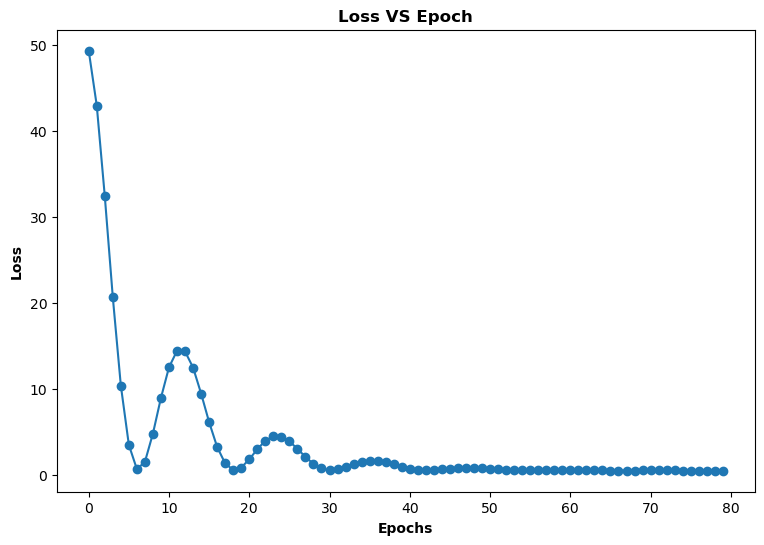

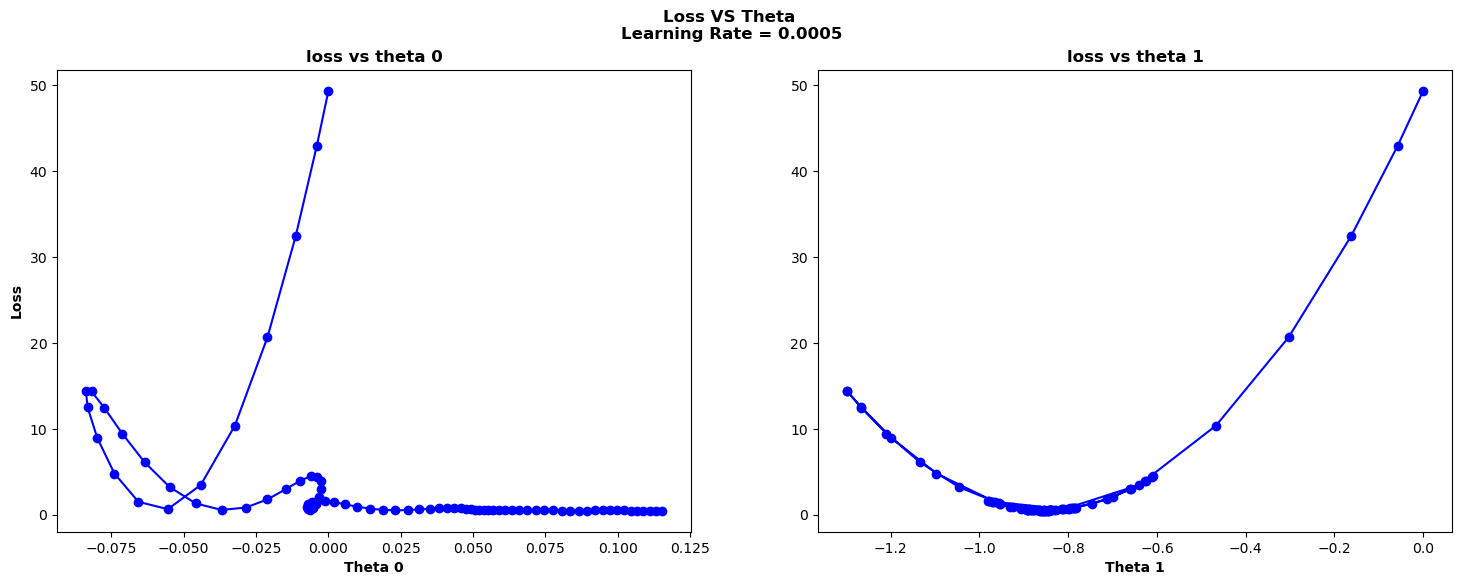

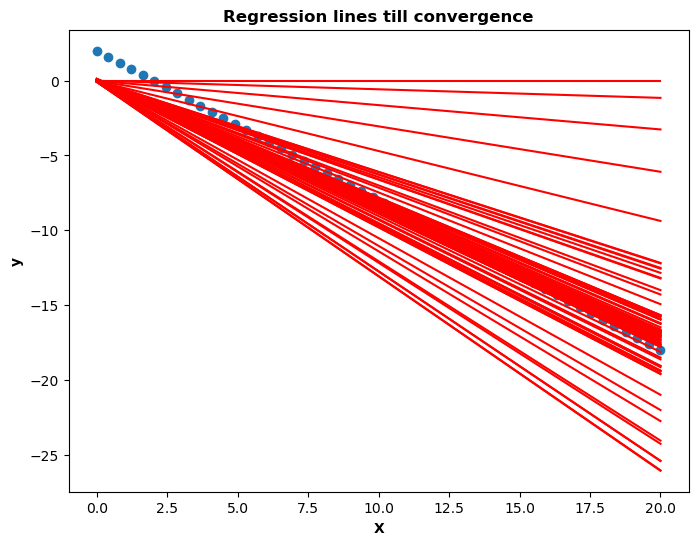

In [17]:
lossVsepochs(loss)
lossVstheta(thetas_0, thetas_1, loss,  0.0005)
reglines(h_xs, X, y)

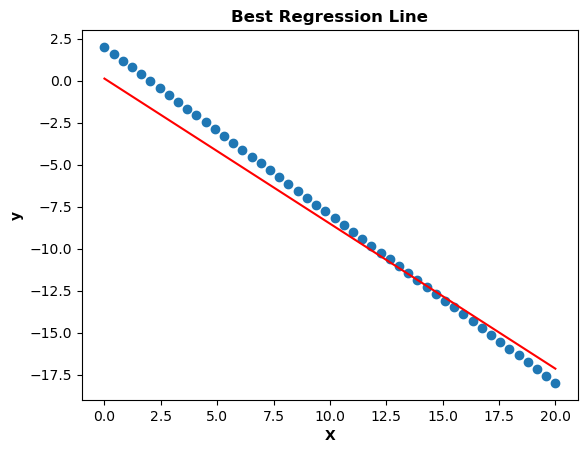

In [18]:
best_reg(h_x_p, X, y)

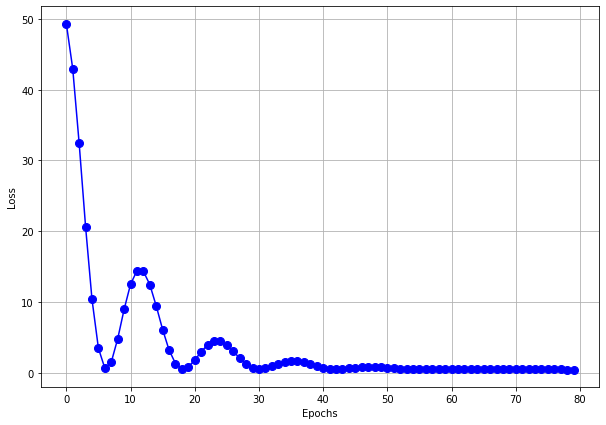

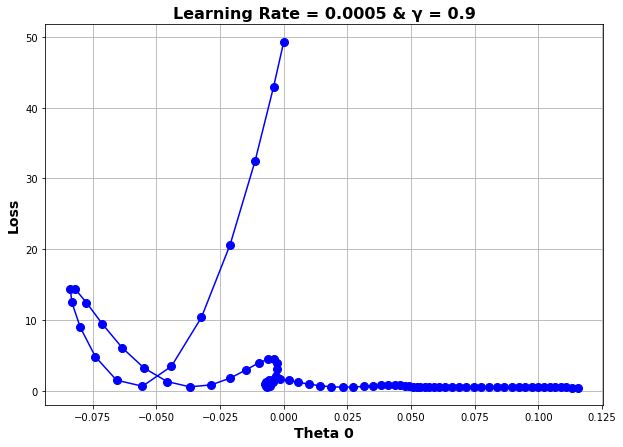

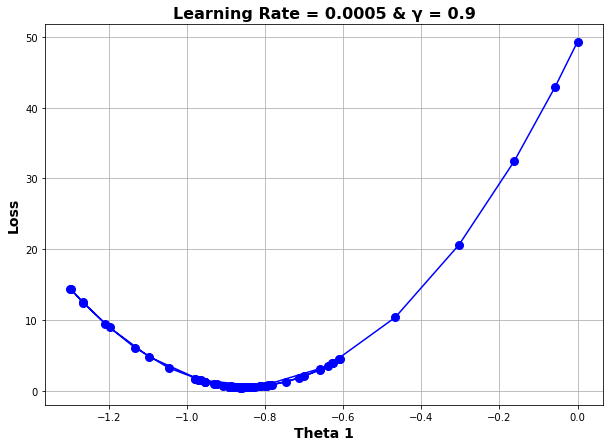

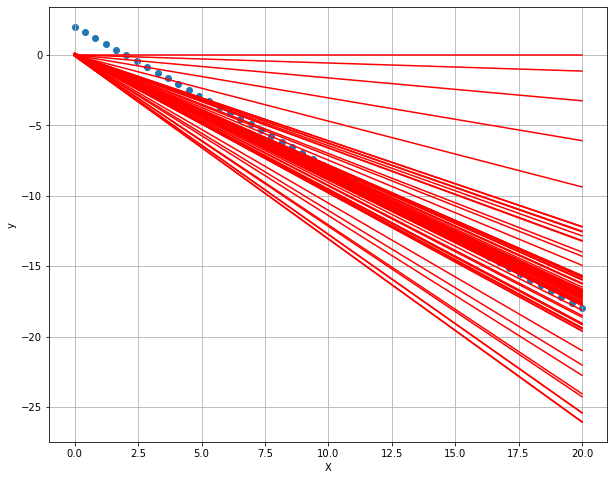

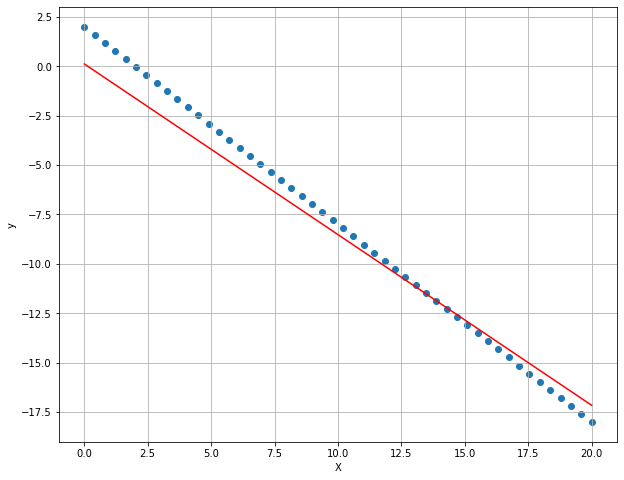

In [18]:
#model answer

##### The following results uses alpha = 0.0005, gamma=0.89 and max. iterations = 300.

In [19]:
thetas_0, thetas_1, loss, h_xs, theta_0, theta_1 = GD_momentum(X,y,0.0005,0.89,300)

******************** Iteration 0 **********************


h(x):  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


Error Vector:
 [-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]


j =  49.34693877551021


Gradient Vector:
  [[  8.        ]
 [114.69387755]]


gradient Vector Norm:
 114.97254258164628


theta_0_new:  -0.004
theta_1_n

In [19]:
#model answer

****************** Iteration 0 ********************

h(x):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j = 49.34693877551021

Gradient Vector:
[[  8.        ]
 [114.69387755]]

Gradient Vector Norm:
114.97254258164628

v_0 : 0.004
v_1 : 0.05734693877551021

theta_0

In [20]:
h_x_p = theta_0 + theta_1 * X
r2_score(y,h_x_p)

0.972435565060376

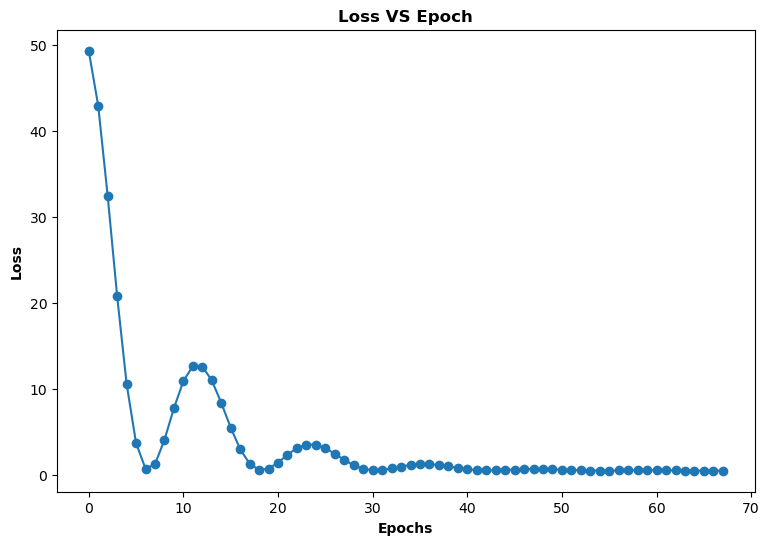

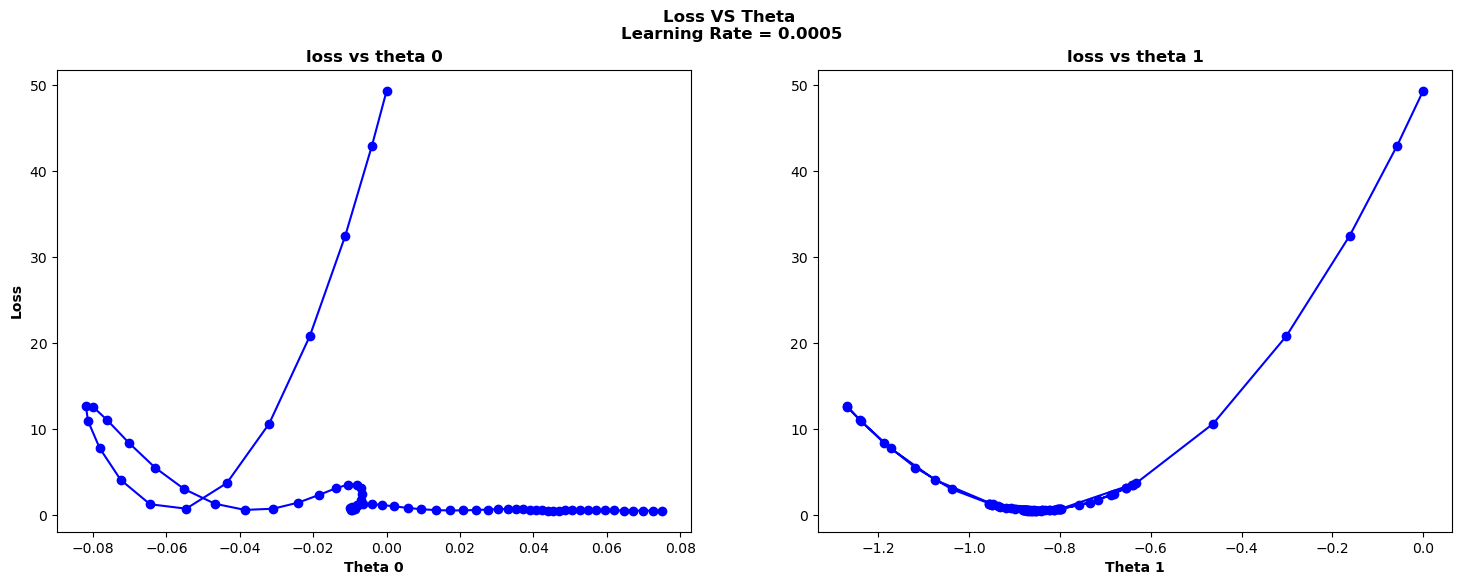

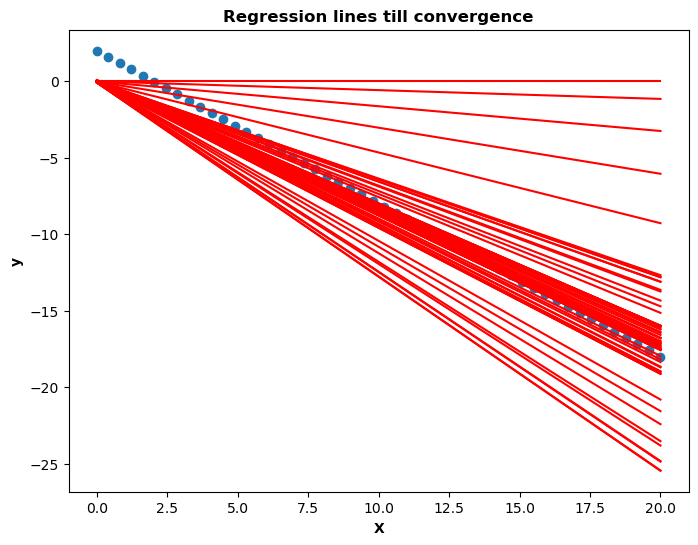

In [ ]:
lossVsepochs(loss)
lossVstheta(thetas_0, thetas_1, loss,  0.0005)
reglines(h_xs, X, y)

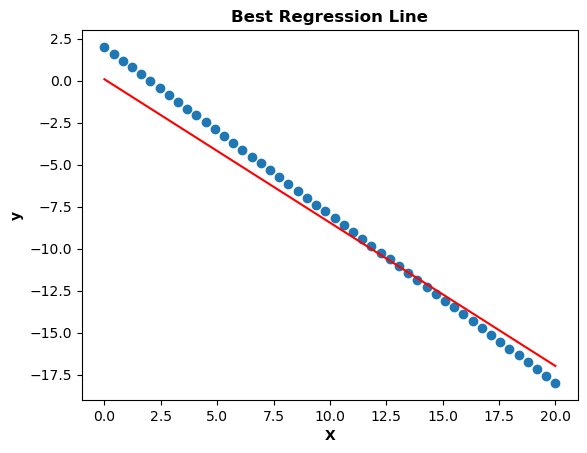

In [23]:
best_reg(h_x_p, X, y)

r2 score =  0.972435565060376


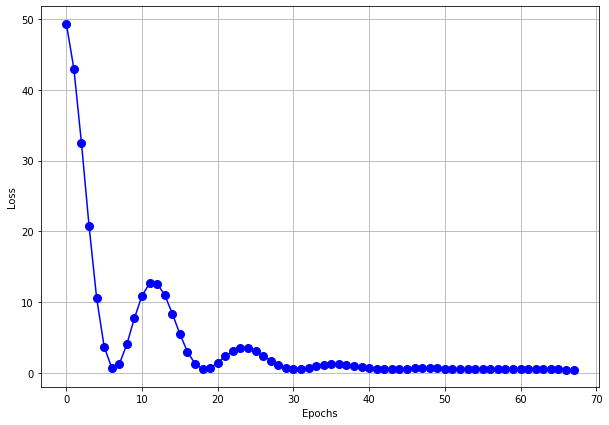

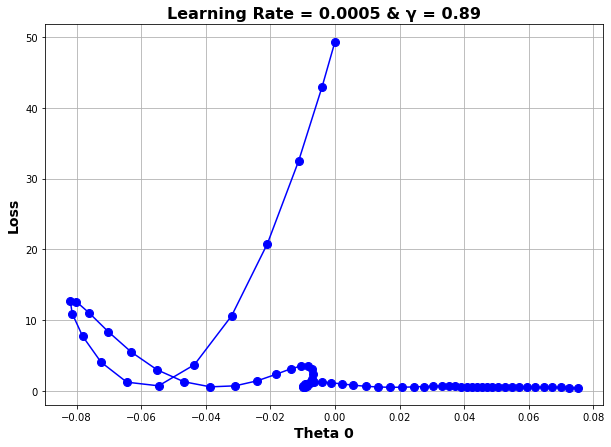

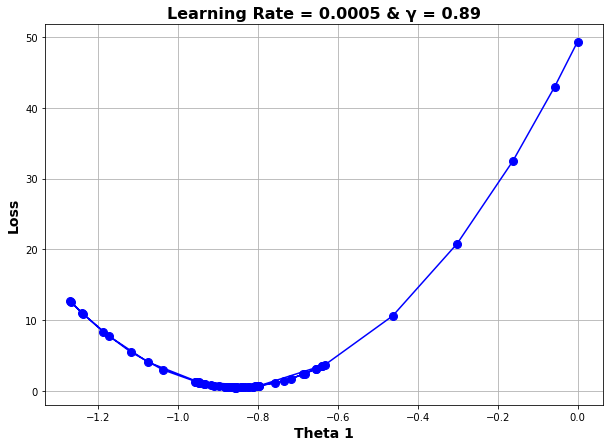

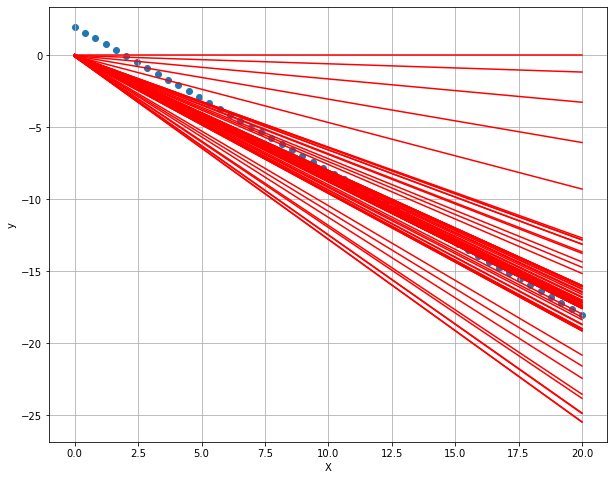

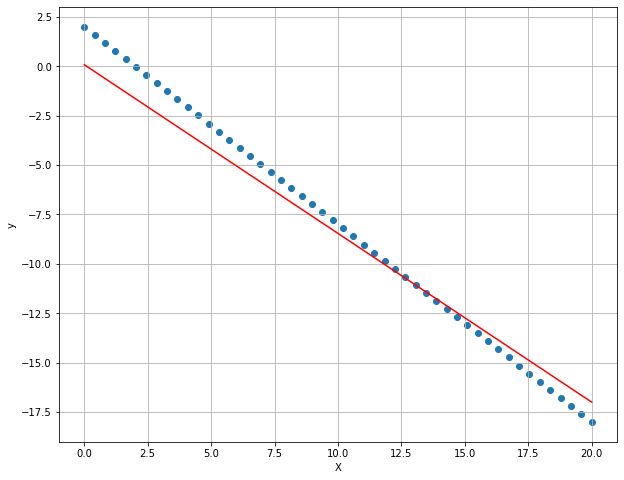

In [20]:
#model answer

### Do not forget:

#### Try another values of momentum term and check your reults.
#### Try very large values close to one and very small values close to zero. 
#### Try momentum = 0 --> becomes normal GD

### Update your Batch GD for one variable  implementation to be NAG and check your results

##### Very Important:
- <b><font color='red'> In order to calculate the gradient at theta_temp, you will need to calculate the prediction (hypothesis output) using theta_temp. </font></b> 
##### h_temp = theta0_temp + theta1_temp * X 

In [24]:
# to solve the problem of vanishing gradient we use the momentum based  gradient descent.
def NGD(X,y,alpha=0.001,gamma=0.9,max_iter=1000,stop_criteria=0.001,convergence_check=0.001):
    '''
    Implementation of the one variable Nestrov Accelerated gradient descent.
    
    Inputs:
    -------
    X: input feature for one variable linear regression (array)
    y: target (array)
    alpha: hyperparameter for updating the thetas using the gradient (double)
    gamma: hyperparameter to estimate the amount taken into momentum from the history (double) (from 0 to 1)
    stop_criteria: stop if the gradient norm is less than this threshold (double)
    convergence_check: stop if the absolute of difference in loss between any 2 iterations is less than this threshold (double)
    
    Outputs:
    --------
    thetas_0: list with all thetas_0 from the initialization till the convergence (without including the last one) (list)
    thetas_1: list with all thetas_1 from the initialization till the convergence (without including the last one) (list)
    loss: list with the amount of loss corresponding to each theta 0 and theta 1
    theta_0: final theta_0 (optimal) (double)
    theta1: final theta_1 (optimal) (double)
    
    '''
    theta_0 = 0
    theta_1 = 0
    m = len(y)
    v_0 = 0
    v_1 = 0
    loss = [] #the list where we save the loss after each iteration
    thetas_0 = [] #each theta0 associated with coressponding loss
    thetas_1 = [] #each theta1 associated with coressponding loss
    h_xs = [] #has the outputs for each corresponding couple of theta
    
    for i in range(max_iter):
        thetas_0.append(theta_0)
        thetas_1.append(theta_1)
        print(f"******************** Iteration {i} **********************")
        print("\n")

        h_x = theta_0 + theta_1*X
        h_xs.append(h_x)
        print("h(x): ", h_x)
        print("\n")

        error = h_x - y
        print("Error Vector:\n", error)
        print("\n")

        J_theta = (1/(2*m))*(error @ error)
        loss.append(J_theta)
        print("j = ", J_theta)
        print("\n")
        if (i>0):
            if (np.abs((loss[i-1]-loss[i])) < convergence_check):
                break

        d_theta_0 = (1/m)*error.sum() #I only need this for the checking condition that we stop if we reach the min
        d_theta_1 = (1/m)* (error @ X) #but we actually update using the gradient of theta temp

        gv = np.array([[d_theta_0],[d_theta_1]])
        gv_norm = norm(gv)
        print("Gradient Vector:\n ", gv)
        print("\n")
        print("gradient Vector Norm:\n", gv_norm)
        print("\n")
        if gv_norm < stop_criteria:
            break
        
        
        theta_0_temp = theta_0 - (gamma*v_0)
        theta_1_temp = theta_1 - (gamma*v_1)
        
        h_x_temp = theta_0_temp + theta_1_temp*X
        error_temp = h_x_temp - y
        d_theta_0_temp = (1/m)*error_temp.sum()
        d_theta_1_temp = (1/m)*(error_temp @ X)
        
        theta_0 = theta_0_temp - (alpha*d_theta_0_temp)
        theta_1 = theta_1_temp - (alpha*d_theta_1_temp)
        
        v_0 = (gamma*v_0) + (alpha*d_theta_0_temp)
        v_1 = (gamma*v_1) + (alpha*d_theta_1_temp)
        print("theta_0_new: ", theta_0)
        print("theta_1_new: ", theta_1)
        print("\n")
        # the last update of theta is not in the list containing the thetas but is in the variables theta_0 and theta_1.
        
    return thetas_0, thetas_1, loss, h_xs, theta_0, theta_1

##### The following results uses alpha = 0.0005, gamma=0.9 and max. iterations = 300.

In [27]:
thetas_0, thetas_1, loss, h_xs, theta_0, theta_1 = NGD(X,y,0.0005,0.9,300)

******************** Iteration 0 **********************


h(x):  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


Error Vector:
 [-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]


j =  49.34693877551021


Gradient Vector:
  [[  8.        ]
 [114.69387755]]


gradient Vector Norm:
 114.97254258164628


theta_0_new:  -0.004
theta_1_n

In [22]:
#model answer

****************** Iteration 0 ********************

h(x):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j = 49.34693877551021

Gradient Vector:
[[  8.        ]
 [114.69387755]]

Gradient Vector Norm:
114.97254258164628

theta_0_new : -0.004
theta_1_new : -0.05734693

In [28]:
h_x_p = theta_0 + theta_1 * X
r2_score(y,h_x_p)

0.971103130756324

In [23]:
#model answer

r2_score 0.971103130756324


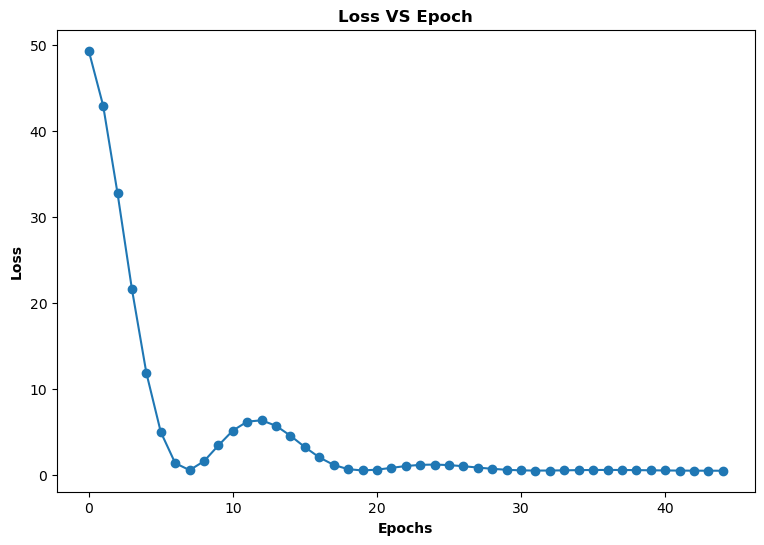

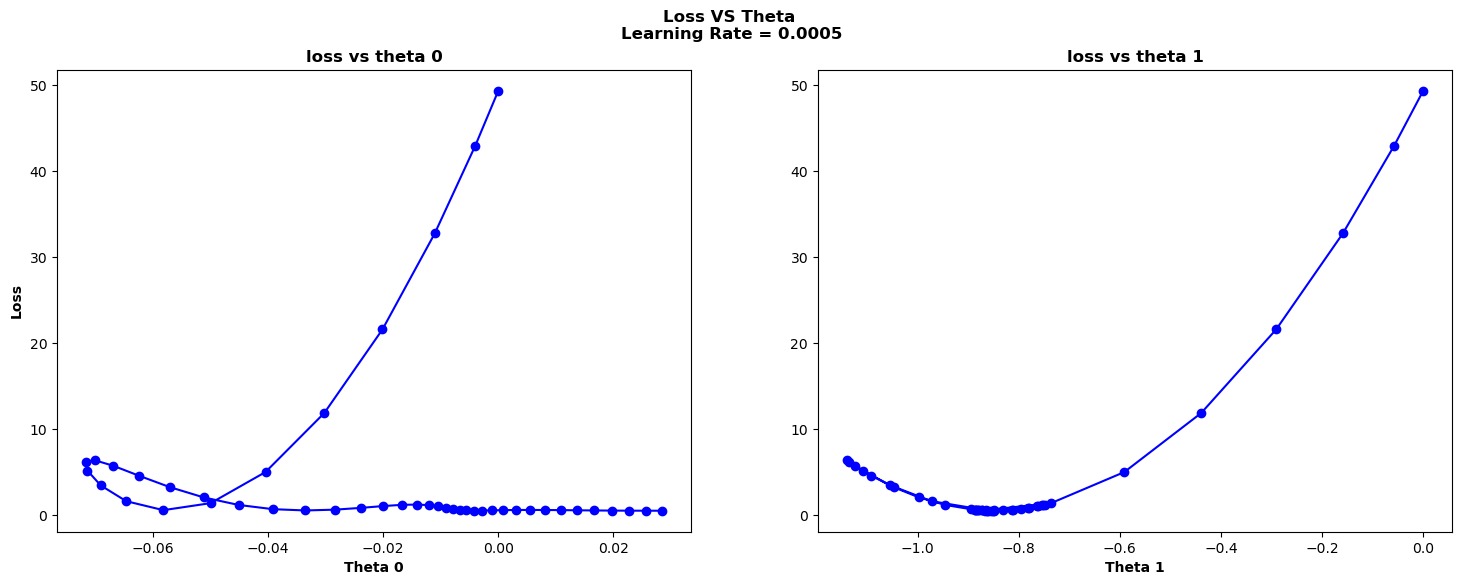

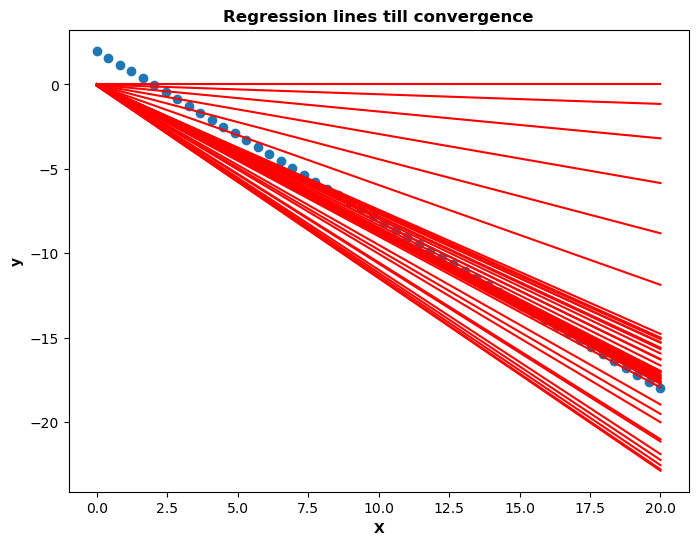

In [29]:
lossVsepochs(loss)
lossVstheta(thetas_0, thetas_1, loss,  0.0005)
reglines(h_xs, X, y)

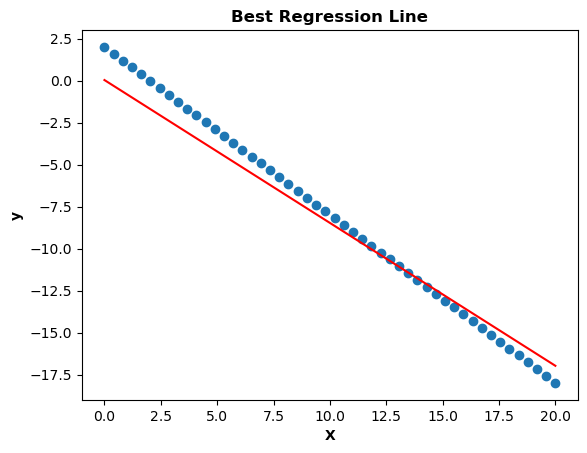

In [30]:
best_reg(h_x_p, X, y)

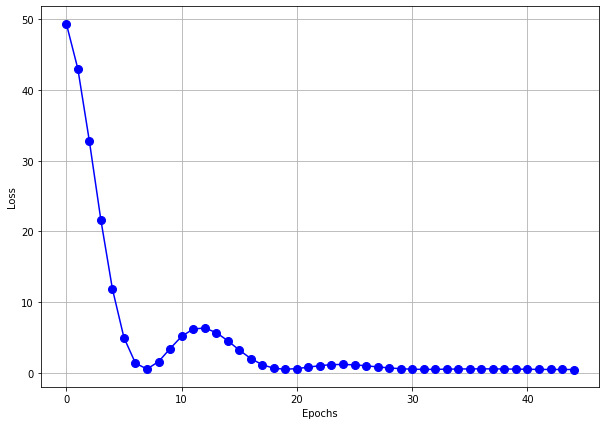

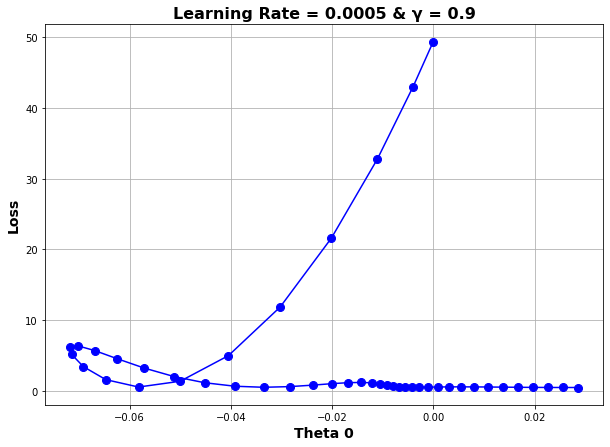

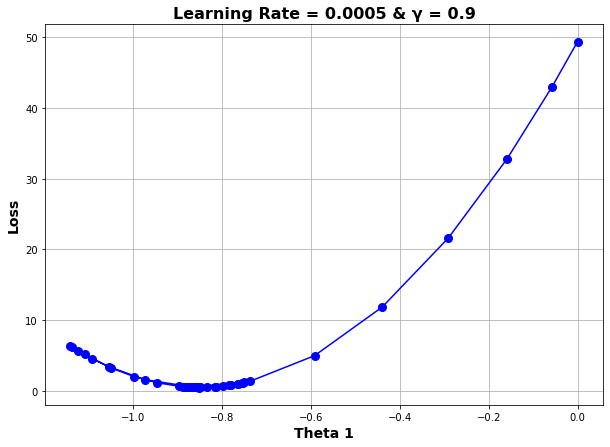

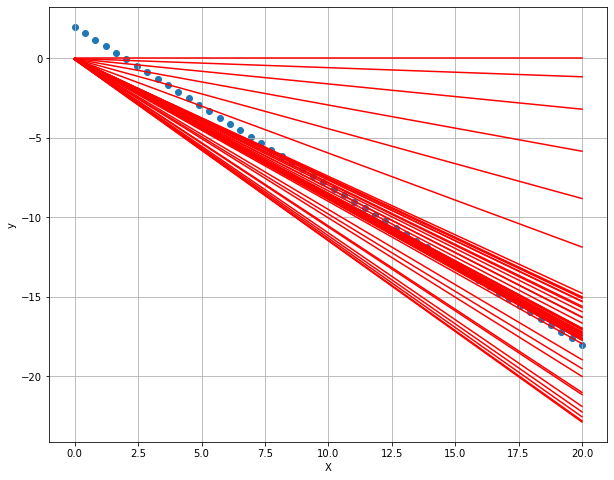

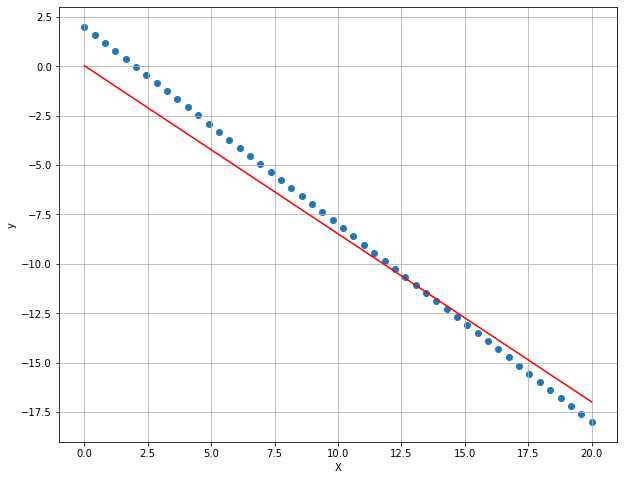

In [24]:
#model answer

##### The following results uses alpha = 0.0005, gamma=0.89 and max. iterations = 300.

In [31]:
thetas_0, thetas_1, loss, h_xs, theta_0, theta_1 = NGD(X,y,0.0005,0.89,300)

******************** Iteration 0 **********************


h(x):  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


Error Vector:
 [-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]


j =  49.34693877551021


Gradient Vector:
  [[  8.        ]
 [114.69387755]]


gradient Vector Norm:
 114.97254258164628


theta_0_new:  -0.004
theta_1_n

In [25]:
#model answer

****************** Iteration 0 ********************

h(x):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j = 49.34693877551021

Gradient Vector:
[[  8.        ]
 [114.69387755]]

Gradient Vector Norm:
114.97254258164628

theta_0_new : -0.004
theta_1_new : -0.05734693

In [34]:
h_x_p = theta_0 + theta_1 * X
r2_score(y,h_x_p)

0.9699718983158406

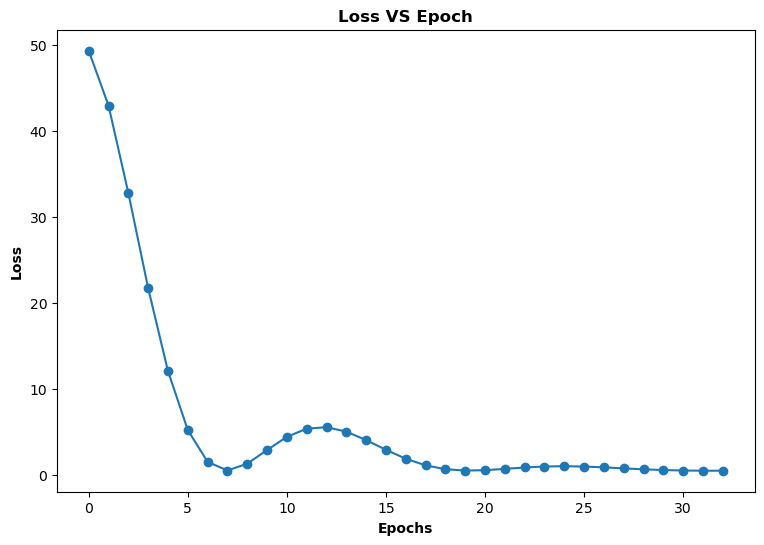

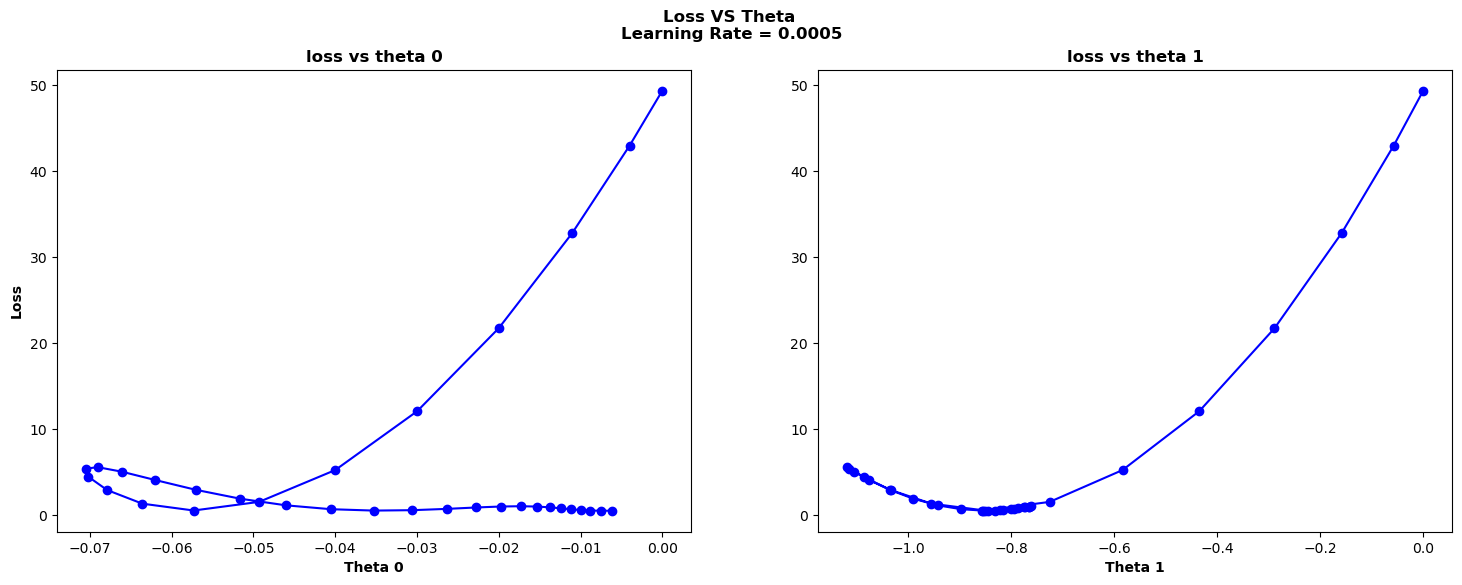

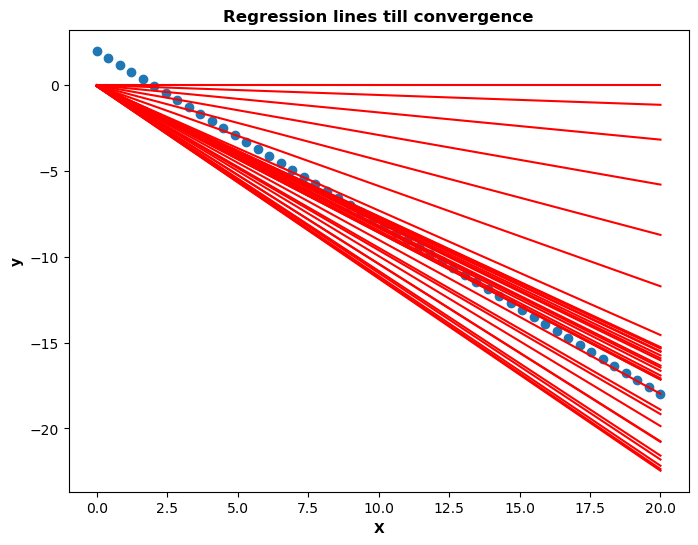

In [35]:
lossVsepochs(loss)
lossVstheta(thetas_0, thetas_1, loss,  0.0005)
reglines(h_xs, X, y)

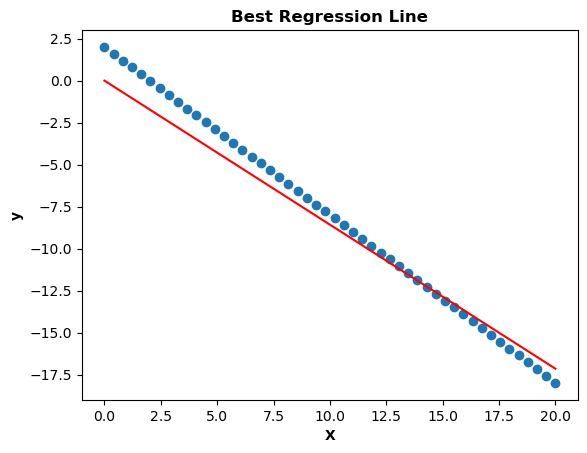

In [36]:
best_reg(h_x_p, X, y)

In [26]:
#model answer

r2 score =  0.9699718983158406


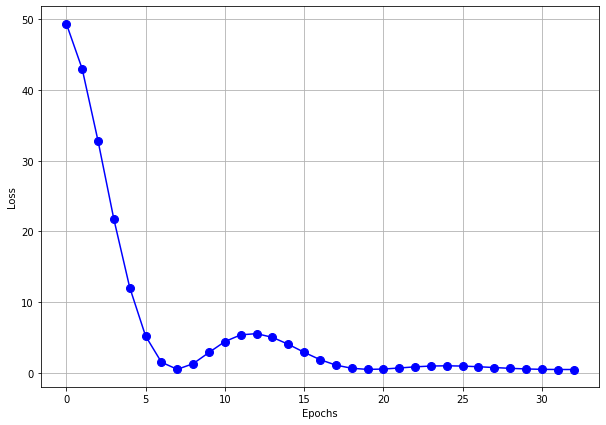

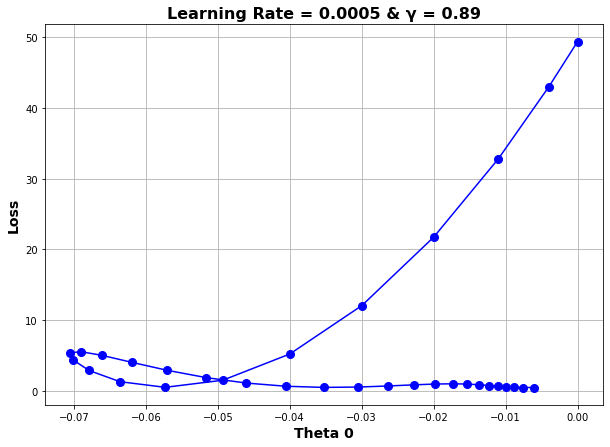

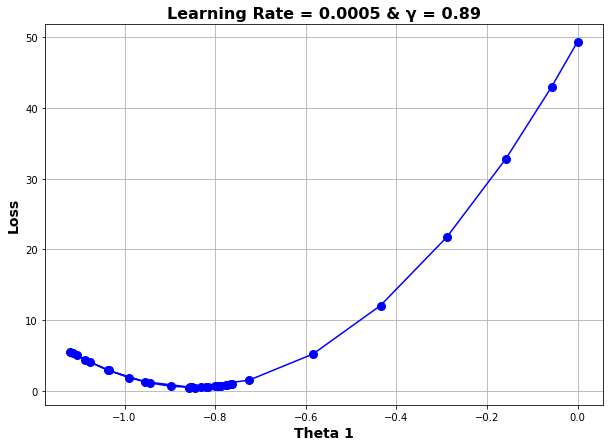

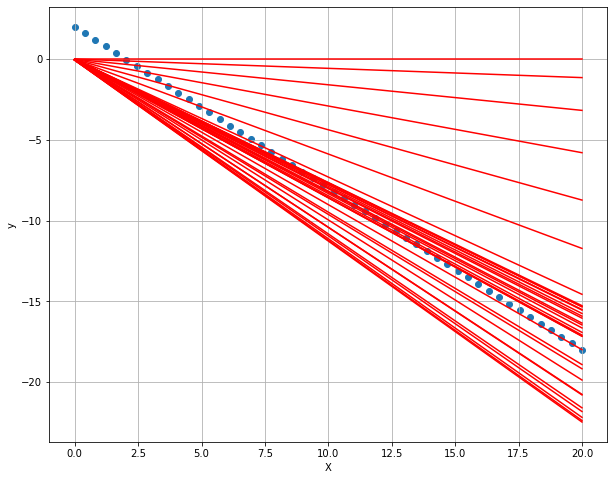

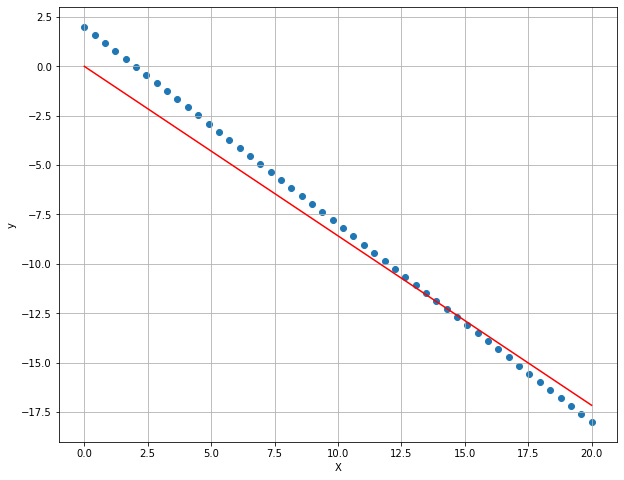

In [27]:
#model answer